In [3]:
import numpy as np
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def linear(x):
    return x

def linear_derivative(x):
    return 1

def rmse(yhat,y):
    return np.mean((yhat-y)**2)**.5

def ce(yhat,y):
    return -np.log(yhat[np.arange(len(yhat)), y])

# Binary Classification

In [4]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

## Derivation of Binary Cross Entropy 

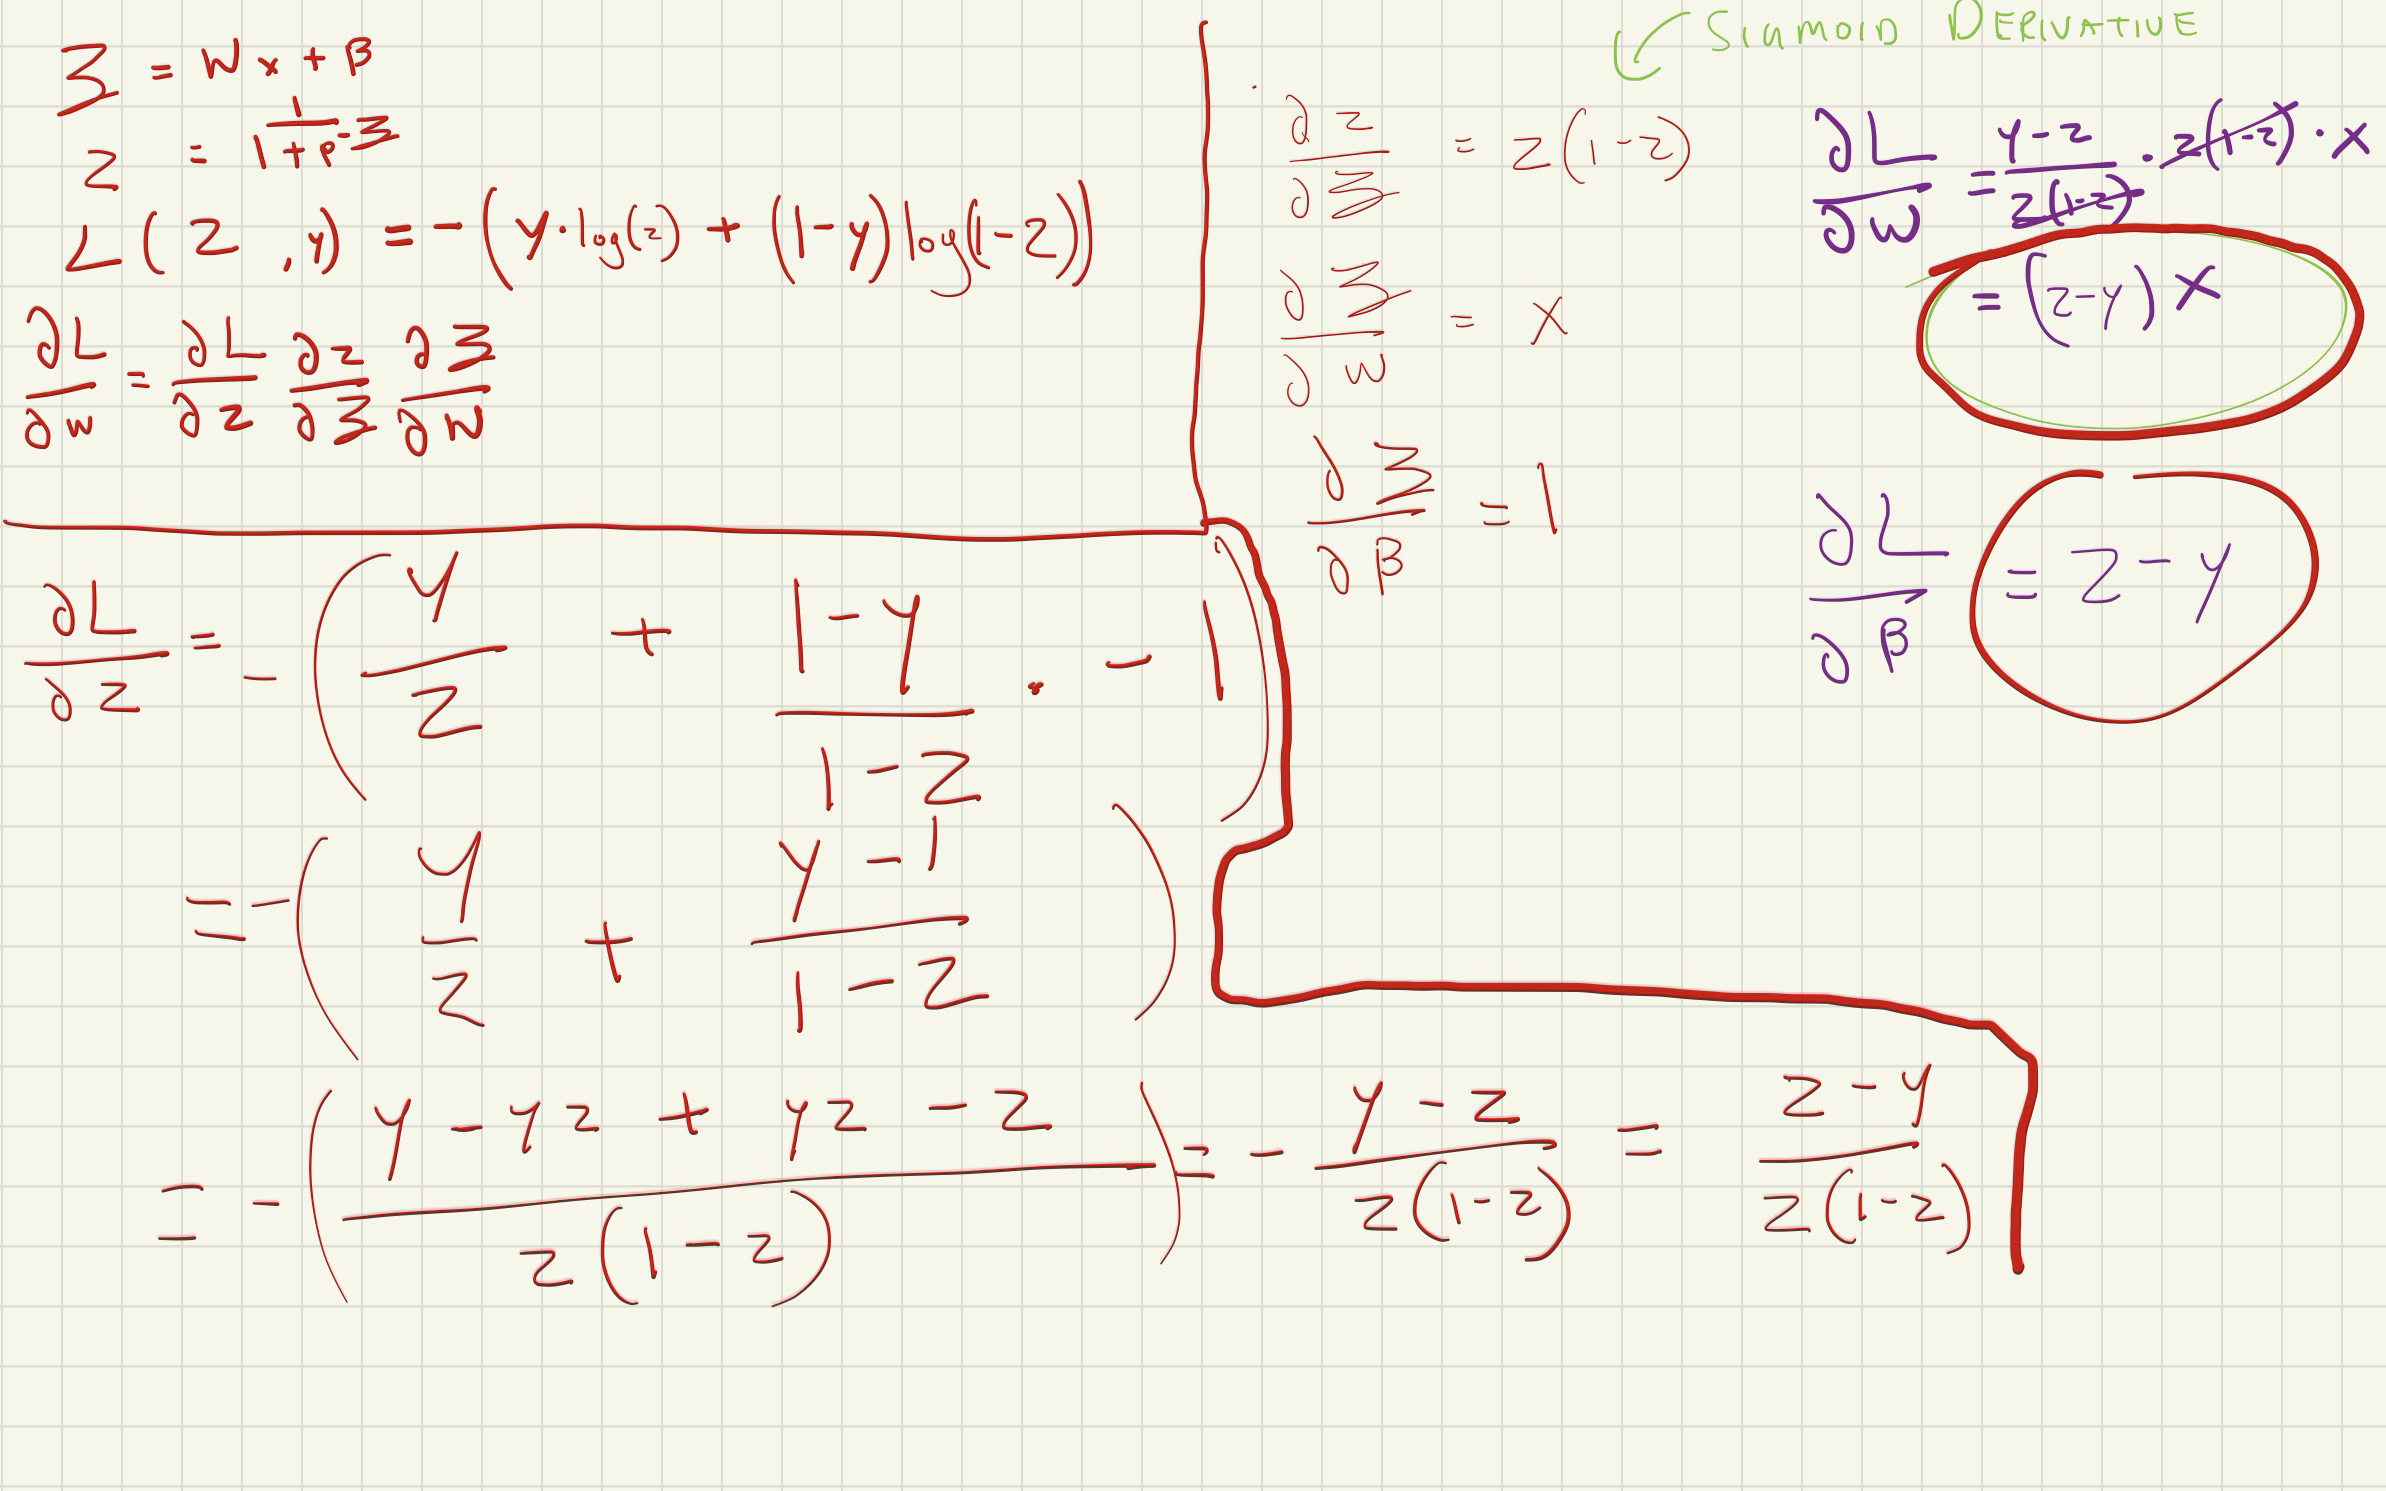

In [5]:
class NeuralNetwork:
    def __init__(self,hidden_units,iters=100,lr=.001):
        self.hidden_units = hidden_units
        self.lr = lr
        self.iters = iters
    
    def fit(self, x, y):
        self.input = x
        self.y = y
        self.losses = []
        n = x.shape[1]
        self.weights1 = np.random.randn(n,self.hidden_units)
        self.bias1 = np.ones((1,self.hidden_units))
        self.weights2 = np.random.randn(self.hidden_units,2)
        self.bias2 = np.ones((1, 2))
        for epoch in range(self.iters):
            self.fforward(self.input)
            self.backprop()                


    def fforward(self,x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.layer1  = sigmoid(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2) + self.bias2
        self.layer2 = sigmoid(self.z2)
        self.yhat = self.layer2


    def backprop(self):
        self.losses.append(np.mean(ce(self.yhat,self.y)))
        self.yhat[np.arange(len(self.yhat)), self.y] -= 1
        self.yhat /= len(self.yhat)
        grad_w1 = np.dot(self.input.T,  (np.dot(self.yhat, self.weights2.T) * sigmoid_derivative(self.layer1)))
        grad_w2 = np.dot(self.layer1.T, self.yhat)
                             
        grad_b1 = np.sum((self.yhat @ self.weights2.T) * sigmoid_derivative(self.layer1), axis=0, keepdims=True)
        grad_b2 = np.sum(self.yhat, axis=0, keepdims=True)
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 -= self.lr*grad_w1
        self.weights2 -= self.lr*grad_w2
        self.bias1    -= self.lr*grad_b1
        self.bias2    -= self.lr*grad_b2
        self.grad_w1, self.grad_w2 = grad_w1,grad_w2
        
        
    def predict(self, x=None):
        if x is not None:
            self.fforward(x)
        return self.yhat


In [6]:
hidden = 100
epochs = 100
nn=NeuralNetwork(hidden, epochs, lr=.01)
nn.fit(X_train,y_train)
preds  = nn.predict(X_test)
# valid accuracy
(np.argmax(preds,1)==y_test).mean()

0.951048951048951

In [7]:
nn.losses

[4.378511845038358,
 4.286418587227647,
 4.1954904062529055,
 4.105687698454418,
 4.0169737588596535,
 3.9293149510929366,
 3.8426809035284064,
 3.757044732353048,
 3.6723832897843223,
 3.588677432941879,
 3.505912305669669,
 3.4240776218925224,
 3.3431679349681827,
 3.26318287327477,
 3.184127318534341,
 3.1060115009693927,
 3.0288509853697745,
 2.9526665255478157,
 2.877483772151458,
 2.803332830266183,
 2.730247677398004,
 2.658265466840808,
 2.587425752935611,
 2.5177696804460403,
 2.4493391787470986,
 2.3821761934710737,
 2.3163219764351406,
 2.2518164428297816,
 2.188697595996015,
 2.127001016165872,
 2.0667594097250617,
 2.0080022178302777,
 1.9507552851566952,
 1.8950405894828197,
 1.8408760304314296,
 1.788275272000914,
 1.7372476302893896,
 1.6877979966590717,
 1.6399267883101933,
 1.5936299225220014,
 1.5488988164366773,
 1.5057204195503386,
 1.464077289527904,
 1.42394772266004,
 1.3853059480864964,
 1.3481223903759505,
 1.312363999188562,
 1.2779946387132475,
 1.2449755244

#### References

https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/algorithms/neuralnetwork/NN.py

# Regression

Does not produce correct results unfortunately

In [8]:
X,y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

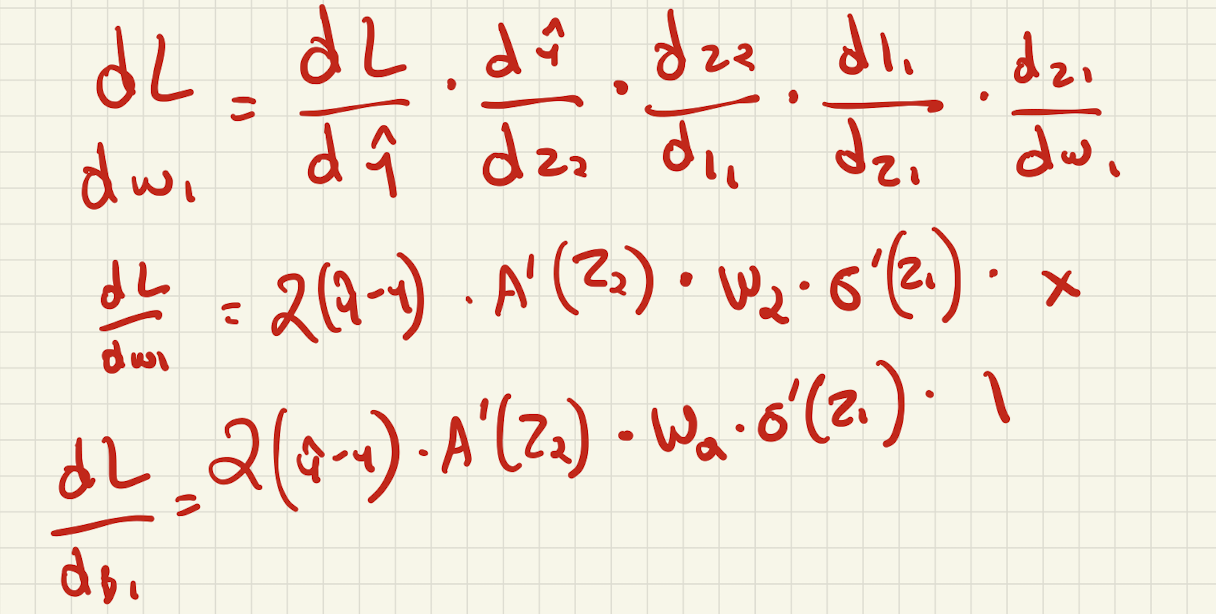

In [14]:
class NeuralNetwork:
    def __init__(self,hidden_units,iters=100,lr=.001):
        self.hidden_units = hidden_units
        self.lr = lr
        self.iters = iters
    
    def fit(self, x, y):
        self.input = x
        self.y = y
        self.m, self.n = x.shape
        self.weights1 = np.random.randn(self.n,self.hidden_units)
        self.bias1 = np.ones((1,self.hidden_units))
        self.weights2 = np.random.randn(self.hidden_units,1)
        self.bias2 = np.ones((1, 1))
        for epoch in range(self.iters):
            self.fforward(self.input)
            self.backprop()

    def fforward(self,x):
        self.z1 = np.dot(x, self.weights1) + self.bias1
        self.layer1  = sigmoid(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2) + self.bias2
        self.layer2 = linear(self.z2)
        self.yhat = self.layer2


    def backprop(self):
        self.loss_der = 2*(self.y - self.yhat)/self.m
        grad_w1 = np.dot(self.input.T,  (np.dot(self.loss_der * linear_derivative(self.z2), self.weights2.T) * sigmoid_derivative(self.layer1)))
        grad_w2 = np.dot(self.layer1.T, (self.loss_der * linear_derivative(self.z2)))
                      
        grad_b1 = np.sum(((self.loss_der * linear_derivative(self.layer2)) @ self.weights2.T) * sigmoid_derivative(self.layer1), axis=0, keepdims=True)
        grad_b2 = np.sum((self.loss_der * linear_derivative(self.layer2)), axis=0, keepdims=True)
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 -= self.lr*grad_w1
        self.weights2 -= self.lr*grad_w2
        self.bias1    -= self.lr*grad_b1
        self.bias2    -= self.lr*grad_b2
        self.grad_w1, self.grad_w2 = grad_w1,grad_w2
                             
    def predict(self, x=None):
        if x:
            self.fforward(x)
        return self.yhat      

In [17]:
hidden = 1
epochs = 100
nn = NeuralNetwork(hidden,iters=epochs,lr=.00001)
nn.fit(X_train,y_train.reshape(-1,1))

In [18]:
# NN model vs. a model which predicts the mean
rmse(nn.predict(),y_train), rmse(y_train.mean()*np.ones((y_train.shape)),y_train)

(24.691450033916528, 9.41709782996042)

In [213]:
# some shapes for debugging
nn.grad_w1.shape, nn.grad_w2.shape, nn.weights1.shape, nn.weights2.shape

((13, 1), (1, 1), (13, 1), (1, 1))